# Ciencia de datos aplicada

## Taller 5

### Contexto

Breast Cancer Wisconsin data set is an example of a classification problem in Supervised Machine Learning.
The task is to predict the Malignant (M) and Benign (B) tumor.

There are 569 rows and 33 columns/features.
The Benign and Malignant cases are as follows.
B 357
M 212

https://www.kaggle.com/priyanka841/breast-cancer-wisconsin?select=breast+cancer.csv

### 1. Importación de librerías y datos

En las siguientes líneas de código se importan las librerías, datos y herramientas necesarias para desarrollar el caso de uso.

In [101]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# modelamiento
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Árbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier

In [10]:
#Cargar los datos
data=pd.read_csv('breast cancer.csv')
data=data.drop(['id','Unnamed: 32'], axis=1)

In [16]:
#Tipos de datos
data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [17]:
#Tamaño de los datos
data.shape

(569, 31)

In [18]:
#Estadísticas básicas
data.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

<AxesSubplot:>

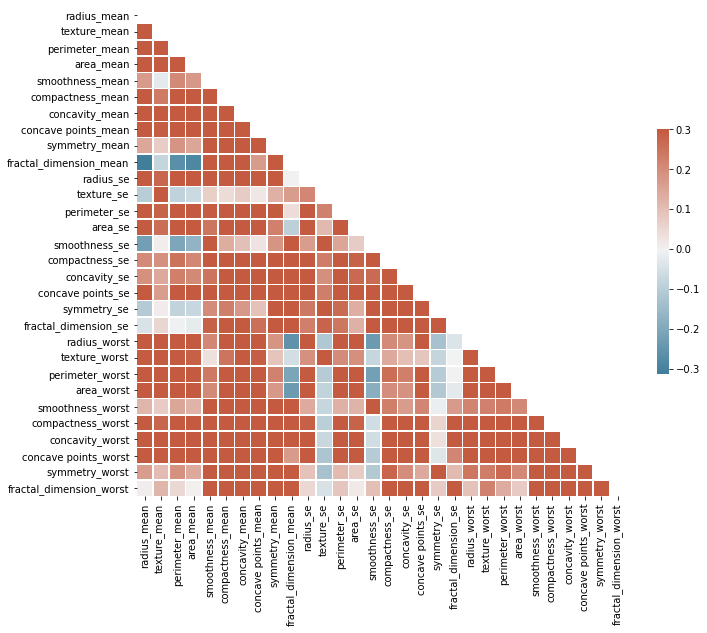

In [26]:
# Gráfico de correlación
corr = data.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

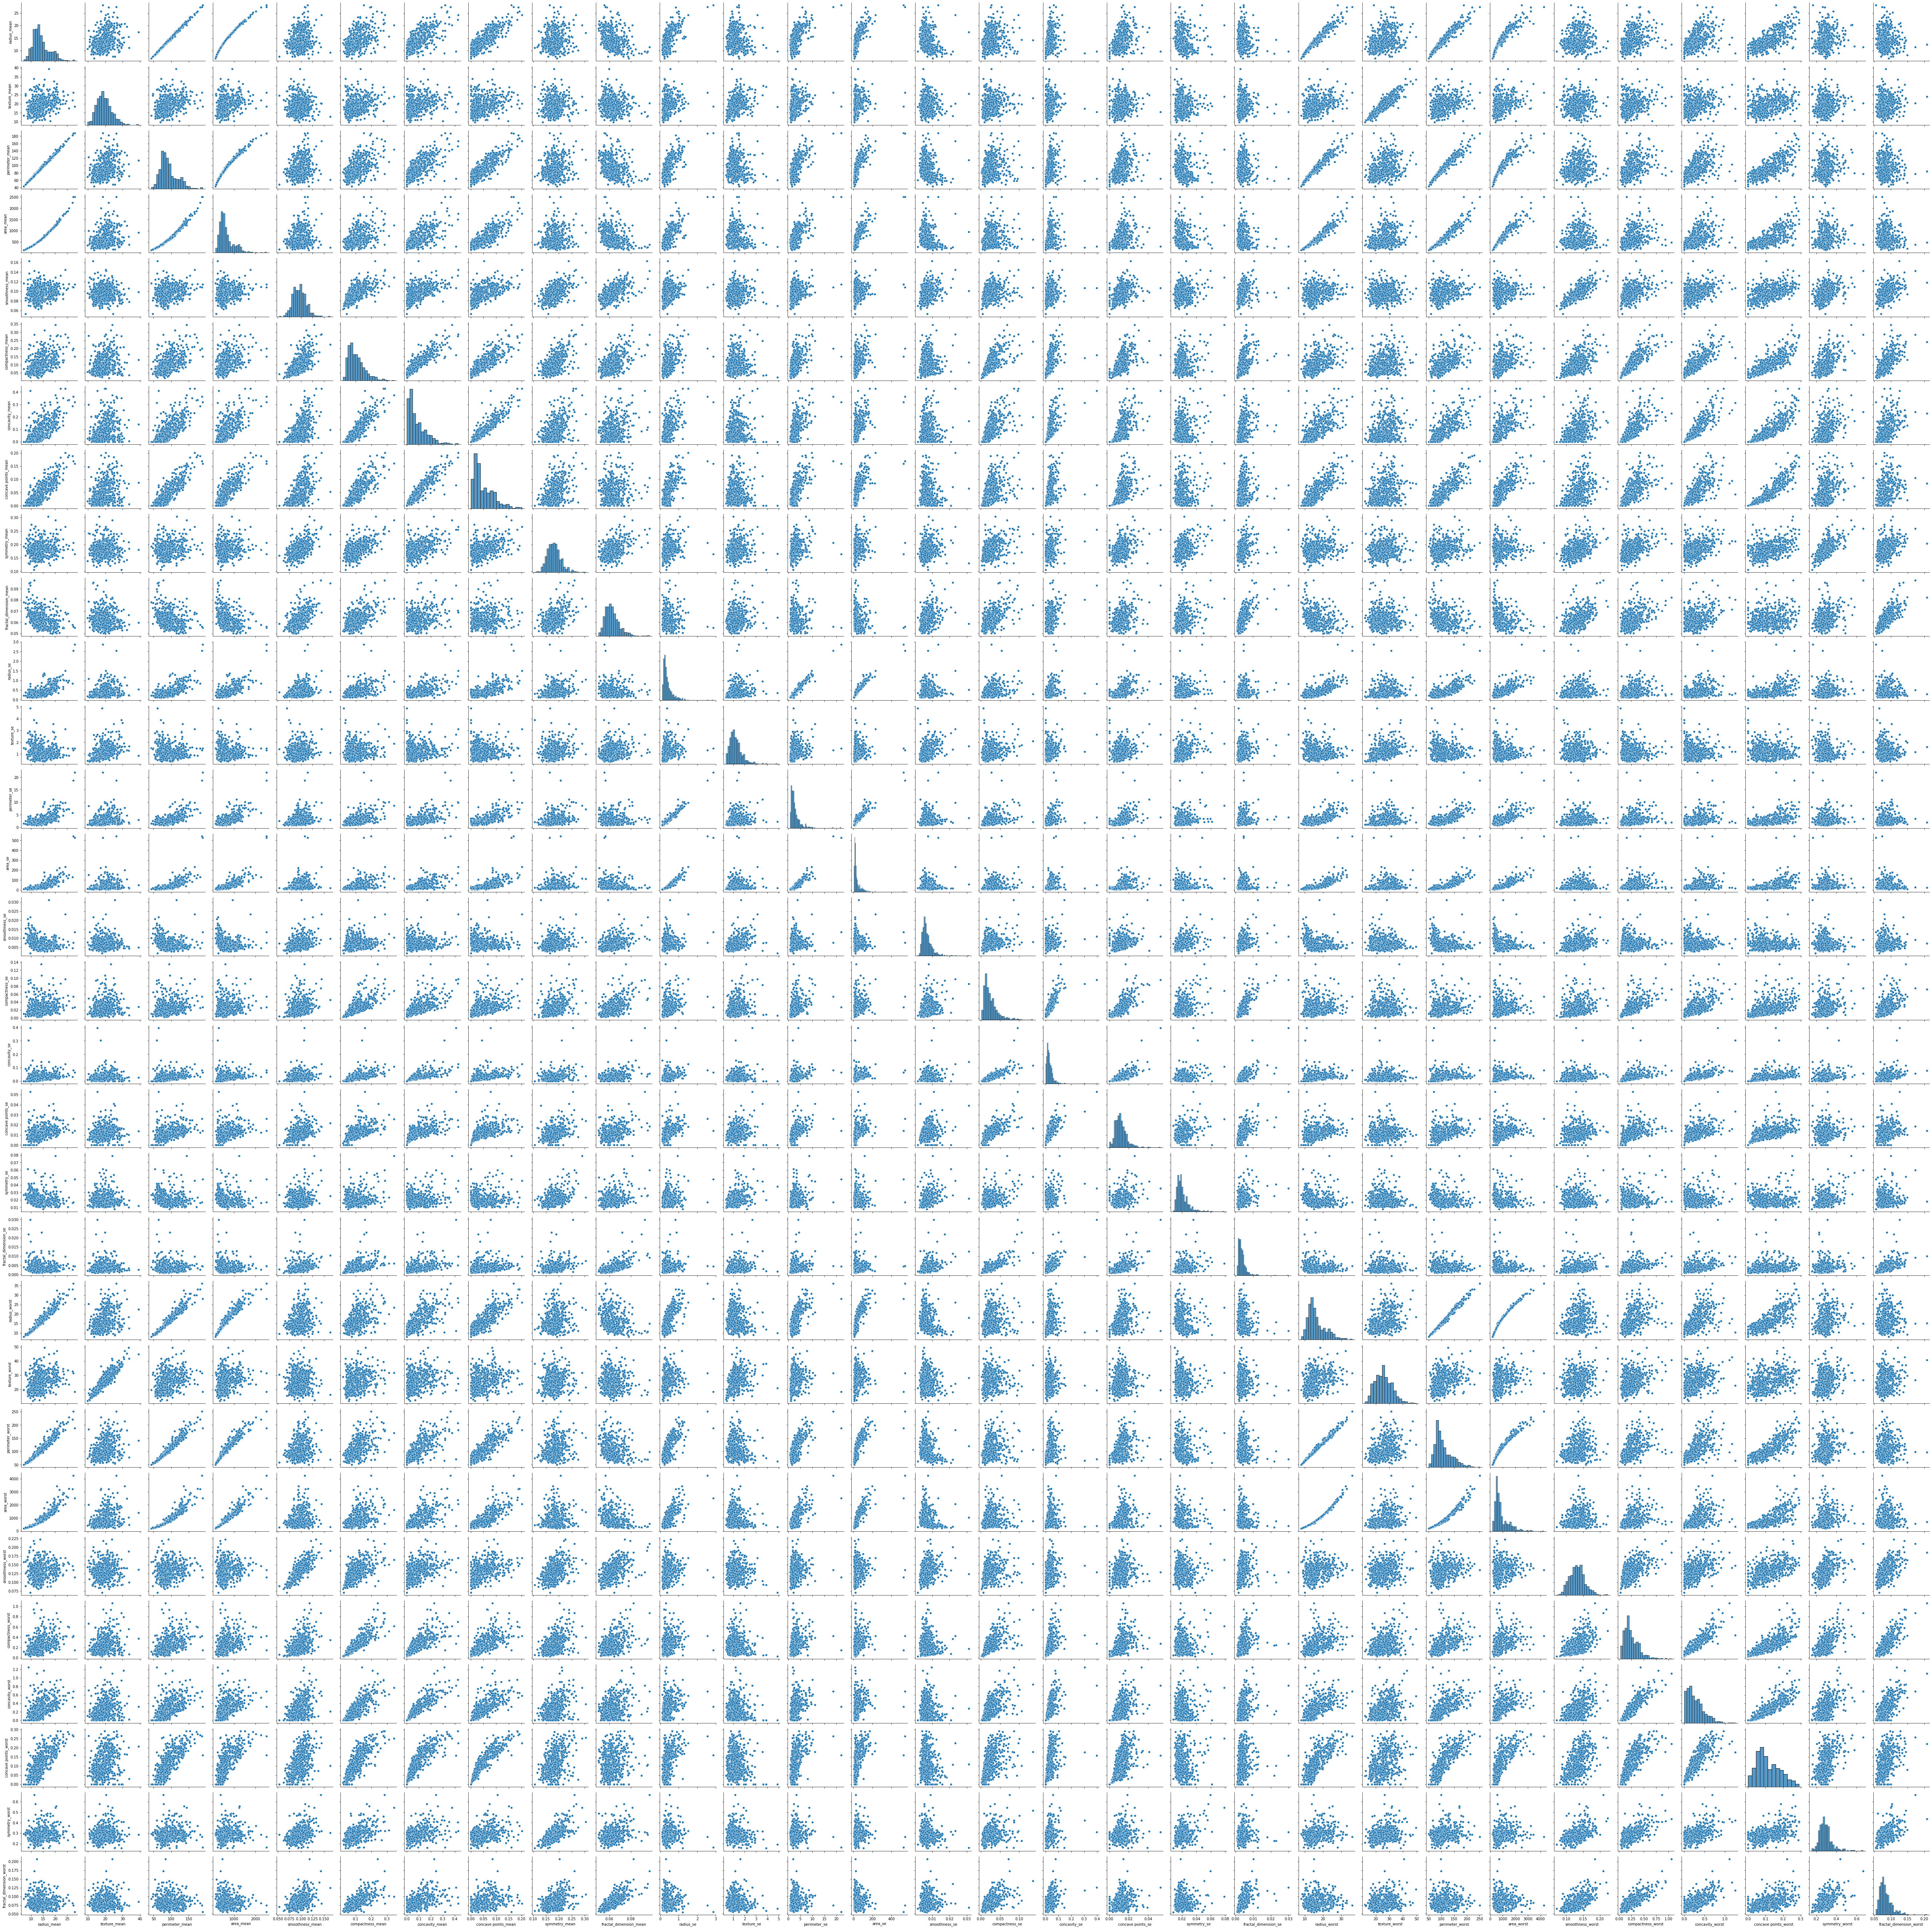

In [27]:
# Gráficos de dispersión e histogramas
g = sns.PairGrid(data.drop(['diagnosis'],axis=1))
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

### 2.Preparación de los datos para el modelos

* Registros faltantes o incompletos.
* Valores atípicos o anomalías.
* Valores inconsistentes y variables categóricas no estandarizadas.
* Características / atributos.
* Entrenamiento y test
* Muestreo bootstrap

In [35]:
# Seleccionar características
atributos=list(data.drop('diagnosis',axis=1).columns[0:round(np.sqrt(len(data.columns)))])
atributos

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean']

In [62]:
# Separar caracerísticas y target
X=data[atributos]
Y=data['diagnosis']

In [70]:
# Cambiar las categorías M-1, B-0
dicc_tumor={
    'M':1,
    'B':0
}
Y=Y.apply(lambda x: dicc_tumor[x])
Y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [71]:
#Crear nueva muestra bootstrap
X=X.sample(frac=1,replace=True)
X.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
21         9.504         12.44           60.34      273.9          0.10240   
282       19.400         18.18          127.20     1145.0          0.10370   
510       11.740         14.69           76.31      426.0          0.08099   
434       14.860         16.94           94.89      673.7          0.08924   
202       23.290         26.67          158.90     1685.0          0.11410   

     compactness_mean  
21            0.06492  
282           0.14420  
510           0.09661  
434           0.07074  
202           0.20840

In [72]:
## Train y test
# Realizamos la base de prueba
X_train, X_test, y_train, y_test = train_test_split( 
          X, Y, test_size = 0.3, random_state = 100)

### 3. Random forest
Es una combinación de árboles predictores tal que cada árbol depende de los valores de un vector aleatorio probado independientemente y con la misma distribución para cada uno de estos. Es una modificación sustancial de bagging que construye una larga colección de árboles no correlacionados y luego los promedia.

In [89]:
# Crear el objeto random forest
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf

RandomForestClassifier(n_estimators=1000, random_state=42)

In [90]:
# Ajustar los datos
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [91]:
###Funciones para el modelado

# Realizamos una función para la predicción
def pred(X_test, clf):
    # Predicton on test with giniIndex
    y_pred = clf.predict(X_test)
    return y_pred

# Función para calcular las métricas
def metricas(y_test, y_pred):
    print("Matriz de confusión: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Precisión : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Reporte : ",
    classification_report(y_test, y_pred))

In [92]:
# Predecir el árbol de decisión
pred(X_test, rf)[0:10]

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [93]:
y_pred=pred(X_test, rf)

In [94]:
metricas(y_test,y_pred)

Matriz de confusión:  [[73 29]
 [49 20]]
Precisión :  54.385964912280706
Reporte :                precision    recall  f1-score   support

           0       0.60      0.72      0.65       102
           1       0.41      0.29      0.34        69

    accuracy                           0.54       171
   macro avg       0.50      0.50      0.50       171
weighted avg       0.52      0.54      0.53       171



### 4. XGBoost Random forest



In [104]:
# Crear el objeto XGBoostRF
xg = XGBRFClassifier(n_estimators=100, subsample=0.9, colsample_bynode=0.2)
xg

XGBRFClassifier(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bynode=0.2, colsample_bytree=None,
                enable_categorical=False, gamma=None, gpu_id=None,
                importance_type=None, interaction_constraints=None,
                max_delta_step=None, max_depth=None, min_child_weight=None,
                missing=nan, monotone_constraints=None, n_estimators=100,
                n_jobs=None, num_parallel_tree=None,
                objective='binary:logistic', predictor=None, random_state=None,
                reg_alpha=None, scale_pos_weight=None, subsample=0.9,
                tree_method=None, validate_parameters=None, verbosity=None)

In [105]:
# fit the model on the whole dataset
xg.fit(X_train, y_train)

[19:39:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=0.2, colsample_bytree=1,
                enable_categorical=False, gamma=0, gpu_id=-1,
                importance_type=None, interaction_constraints='',
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=8,
                num_parallel_tree=100, objective='binary:logistic',
                predictor='auto', random_state=0, reg_alpha=0,
                scale_pos_weight=1, subsample=0.9, tree_method='exact',
                validate_parameters=1, verbosity=None)

In [107]:
pred(X_test,xg)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [109]:
#metricas
y_pred=pred(X_test,xg)
metricas(y_test,y_pred)

Matriz de confusión:  [[83 19]
 [63  6]]
Precisión :  52.046783625730995
Reporte :                precision    recall  f1-score   support

           0       0.57      0.81      0.67       102
           1       0.24      0.09      0.13        69

    accuracy                           0.52       171
   macro avg       0.40      0.45      0.40       171
weighted avg       0.44      0.52      0.45       171



### 5. Comparación de modelos

La cuestión de cómo se debe elegir entre explicaciones competitivas de los datos observados está en el centro de la ciencia. La comparación de modelos es ubicua y surge, por ejemplo, cuando un toxicólogo debe decidir entre dos modelos de dosis-respuesta o cuando un bioquímico necesita determinar cuál de un conjunto de modelos de cinética enzimática explica mejor los datos observados. 

Dada una muestra de datos, la adecuación descriptiva de un modelo se evalúa encontrando los valores de los parámetros del modelo que mejor se ajustan a los datos en algún sentido definido. Seleccionar entre modelos que utilicen una medida de bondad de ajuste tendría sentido si los datos estuvieran libres de ruido. 

La generalizabilidad o precisión predictiva se refiere a qué tan bien un modelo predice las propiedades estadísticas de muestras futuras, aún no vistas, de una réplica del experimento que generó la muestra de datos actual. La generalizabilidad es una discrepancia media entre el modelo verdadero y el modelo de interés, promediado entre todos los datos que posiblemente podrían observarse con el modelo verdadero. Se encuentra que la validación cruzada se puede implementar fácilmente utilizando cualquier lenguaje de programación de computadoras ya que su cálculo no requiere técnicas computacionales sofisticadas, en contraste con la longitud mínima de descripción.

In [95]:
# Crear un árbol de decisión
dt = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)

In [96]:
# Ajustar los datos
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [98]:
#Establecer métricas
y_pred=pred(X_test,dt)
metricas(y_test,y_pred)

Matriz de confusión:  [[72 30]
 [43 26]]
Precisión :  57.30994152046783
Reporte :                precision    recall  f1-score   support

           0       0.63      0.71      0.66       102
           1       0.46      0.38      0.42        69

    accuracy                           0.57       171
   macro avg       0.55      0.54      0.54       171
weighted avg       0.56      0.57      0.56       171



In [111]:
for i in [rf,dt,xg]:
    print('Modelo '+str(i))
    metricas(y_test,pred(X_test,i))

Modelo RandomForestClassifier(n_estimators=1000, random_state=42)
Matriz de confusión:  [[73 29]
 [49 20]]
Precisión :  54.385964912280706
Reporte :                precision    recall  f1-score   support

           0       0.60      0.72      0.65       102
           1       0.41      0.29      0.34        69

    accuracy                           0.54       171
   macro avg       0.50      0.50      0.50       171
weighted avg       0.52      0.54      0.53       171

Modelo DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)
Matriz de confusión:  [[72 30]
 [43 26]]
Precisión :  57.30994152046783
Reporte :                precision    recall  f1-score   support

           0       0.63      0.71      0.66       102
           1       0.46      0.38      0.42        69

    accuracy                           0.57       171
   macro avg       0.55      0.54      0.54       171
weighted avg       0.56      0.57      0.56       171

Modelo XGBRFClassifier(base_scor

## Extesión
1. Crear el modelo con muestras de bootstrap diferentes
2. Seleccionar otras características
3. Elegir el mejor modelo con la selección anterior
4. Buscar la combinación óptima con los 3 items anteriores